In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from scipy.stats import loguniform

In [2]:
X_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD')
X_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD')
y_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD')
y_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD')
X_train.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,19061001102,7.675790,41.308712,0.238955,22.002295,0.270613,206.808298,0.304035,0.268852,1.043339,0.560035,-0.351666
1,27015960600,6.294374,40.220123,0.110106,18.973409,0.227570,69.714908,0.598836,0.013274,0.604208,0.046160,-0.434057
2,36047017100,8.689179,40.157880,2.029418,42.893829,0.744788,3197.930125,0.825212,0.348693,0.280226,107.436218,-0.434061
3,26099224500,9.080132,44.116969,0.451251,28.786964,0.349434,658.197961,0.040913,0.143559,0.111026,0.850032,-0.434061
4,41059950200,9.457754,46.477580,0.083931,21.090690,0.290217,243.038025,0.443595,0.016256,0.077002,0.064230,-0.434061


In [3]:
X_test.set_index('CensusTract', inplace=True)
X_train.set_index('CensusTract', inplace=True)

In [4]:
print(X_test.shape, y_test.shape, y_train.shape)

(18081, 11) (18081, 2) (54242, 2)


In [5]:
y_test.head()


,CensusTract,COPD_prevalence
0,48251130210,7.3
1,22069000400,9.5
2,39105964600,12.4
3,32003004602,10.9
4,42101007900,3.9


In [6]:
y_test.set_index('CensusTract', inplace=True)
y_train.set_index('CensusTract', inplace=True)

In [7]:
y_test = np.array(y_test)
y_test = y_test.reshape(18081,)
y_train = np.array(y_train)
y_train = y_train.reshape(54242,)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)


(54242, 11) (18081, 11) (18081,) (54242,)


In [8]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
48251130210,9.107989,45.878020,0.245880,31.293715,0.408591,81.736219,0.068799,0.025965,0.187365,0.182960,0.000021
22069000400,9.218425,35.443146,0.212973,40.289872,0.596499,177.486754,0.148310,0.021718,0.357363,0.026640,0.000169
39105964600,8.538189,41.798904,0.234670,28.832846,0.364220,4.962306,0.300045,0.103550,0.288699,0.172542,0.129253
32003004602,7.346402,55.513488,0.703794,40.467171,0.606575,347.524384,0.060020,0.004481,1.727927,5.163652,0.000194
42101007900,9.507961,44.269933,0.737931,36.641995,0.477338,382.720756,0.826435,0.120161,0.924759,5.161382,581.032916


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [78]:
# Instantiate RandomForestRegressor 
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
y_pred = rf.predict(X_test)

In [80]:
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5961153206764117
MAE: 1.202229578010066
MSE: 2.7741622827830317
RMSE: 1.6655816649996575


This R2 score is mediocre. Tuning hyperparameters next.

In [9]:
# Instantiate RandomForestRegressor and randomly search for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {'n_estimators': sp_randInt(1,500), 'max_depth':sp_randInt(1,30)}

rs = RandomizedSearchCV(rf, params)

In [10]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1419b70d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1061f5880>})

In [11]:
rs.best_estimator_

RandomForestRegressor(max_depth=28, n_estimators=262)

In [12]:
rf = RandomForestRegressor(max_depth=28, n_estimators=262)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=28, n_estimators=262)

In [13]:
y_pred = rf.predict(X_test)

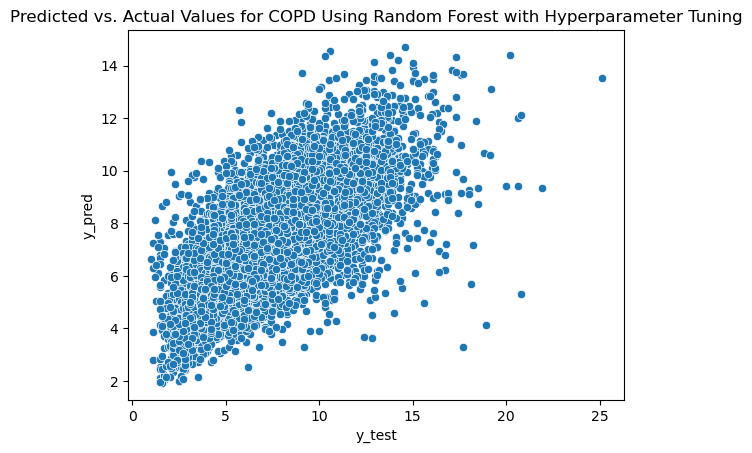

In [14]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for COPD Using Random Forest with Hyperparameter Tuning')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [15]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.571371908273864
MAE: 1.2549972550209483
MSE: 2.9441173341839746
RMSE: 1.7158430389123518


In [87]:
# Instantiating AdaBoostRegressor and fitting it to the training data
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [88]:
y_pred = ada.predict(X_test)

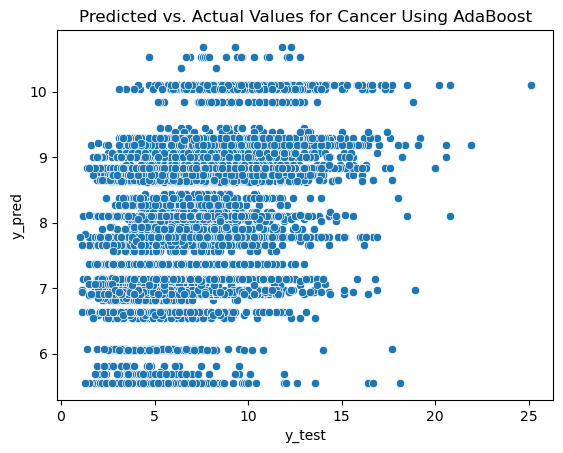

In [89]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Cancer Using AdaBoost')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [90]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.01651763191040767
MAE: 2.184422833976088
MSE: 6.982153616107916
RMSE: 2.6423765091500333


Since Adaboost with the default hyperparameters is not giving reasonable results, the next step will be to search for the best hyperparameters.

In [91]:
# Instantiate AdaBoost Regressor and randomly search for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {'n_estimators': sp_randInt(1,500), 'learning_rate':sp_randFloat(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [92]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15455e5e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15454cc40>})

In [93]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=97.4842609938711, n_estimators=381)

In [94]:
ada = AdaBoostRegressor(learning_rate=97.4842609938711, n_estimators=381)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=97.4842609938711, n_estimators=381)

In [95]:
y_pred = ada.predict(X_test)

In [96]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -5.4736150066809595
MAE: 6.131607765057198
MSE: 44.4653127592495
RMSE: 6.668231606599272


This just made the results worse. Next will be Gradient Boost Regressor.

In [97]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [98]:
y_pred = gb.predict(X_test)

In [99]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.401054499167933
MAE: 1.518783397443503
MSE: 4.113976347490216
RMSE: 2.0282939499713093


Now with randomly tuned hyperparameters.

In [100]:
# Randomly search for best hyperparameters n_estimators and learning rate
gb = GradientBoostingRegressor()
params = {'n_estimators': [1, 2, 5, 10, 20, 50, 100, 200, 500], 'max_leaf_nodes': [2, 5, 10, 20, 50, 100], 'learning_rate': loguniform(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [101]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1576c13a0>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [102]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.2780678795383295, max_leaf_nodes=10,
                          n_estimators=200)

In [103]:
gb = GradientBoostingRegressor(learning_rate=0.2780678795383295, max_leaf_nodes=10,
                          n_estimators=200)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2780678795383295, max_leaf_nodes=10,
                          n_estimators=200)

In [104]:
y_pred = gb.predict(X_test)

In [105]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4771062598368315
MAE: 1.4041149078892308
MSE: 3.5915996969565995
RMSE: 1.8951516290145756


This is still not as good as Random Forest. Next model will be XGBoost.

In [106]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
y_pred = xgb.predict(X_test)

In [57]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5414594699458484
MAE: 1.303031118163611
MSE: 3.1495768686595818
RMSE: 1.7747047271756453


This is still not as good as Random Forest, so I will do hyperparameter tuning on max_depth, min_child_weight, and gamma.

In [58]:
# Instantiate XGBRegressor Regressor and randomly search for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {'max_depth': sp_randInt(1,200), 'min_child_weight':sp_randInt(1,200), 'gamma':sp_randInt(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [59]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x153db6820>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x153db6af0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x153dcb400>})

In [60]:
rs.best_params_

{'gamma': 24, 'max_depth': 57, 'min_child_weight': 190}

In [61]:
xgb = XGBRegressor(gamma=24, max_depth=57, min_child_weight=190)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=24, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=57, max_leaves=None,
             min_child_weight=190, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
y_pred = xgb.predict(X_test)

In [63]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5673445519018292
MAE: 1.2626119672273035
MSE: 2.971780032767481
RMSE: 1.7238851564902695


This is slightly better than XGBoost without tuning the hyperparameters, but it is still not as good as Random Forest. I will try LightGBM.

In [81]:
lgbm = ltb.LGBMRegressor()
params = {'reg_alpha': sp_randFloat(1e-3,100), 'reg_lambda': sp_randFloat(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [82]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x153dcd460>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1577b2670>})

In [83]:
rs.best_estimator_

LGBMRegressor(reg_alpha=21.26604397101863, reg_lambda=23.680040880861604)

In [84]:
lgbm = ltb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, reg_alpha=21.26604397101863, reg_lambda=23.680040880861604)
lgbm.fit(X_train, y_train) 

LGBMRegressor(reg_alpha=21.26604397101863, reg_lambda=23.680040880861604)

In [85]:
y_pred = lgbm.predict(X_test)

In [86]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5111942328962853
MAE: 1.3515919024375198
MSE: 3.3574596713521716
RMSE: 1.832337215512519


Not as good as the previous model. The next model I will try is a support vector machine regressor.

In [107]:
# Importing normalized data
X_test_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD')
X_train_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD')
y_test_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD')
y_train_log = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD')
X_train_log.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,32003002961,7.020828,55.534960,0.917367,0.287083,0.530685,0.344931,-1.293792,-1.380519,0.247426,0.507938
1,18097310204,9.312653,44.314528,0.839156,-0.128422,-0.115502,0.054532,-1.041797,0.462086,1.963273,0.927542
2,48453001308,9.493040,41.367930,0.615746,0.371394,0.170443,1.201532,-0.211880,-1.151121,0.588443,0.592208
3,15009030301,0.000000,0.000000,-2.295210,-3.831500,-3.047175,-1.148260,-0.453107,-1.367256,0.178587,-0.916296
4,6111000200,8.453749,57.221836,-1.199415,0.155523,0.384052,0.125365,0.366184,0.416839,0.400620,-1.252648


In [108]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': sp_randFloat(.01,10), 'epsilon':sp_randFloat(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [109]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1576f2e20>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1576f7850>})

In [110]:
svm_rs.best_estimator_

SVR(C=5.150003902430793, epsilon=2.184783042590056)

In [111]:
svm = SVR(C=5.150003902430793, epsilon=2.184783042590056)
svm.fit(X_train, y_train)

SVR(C=5.150003902430793, epsilon=2.184783042590056)

In [112]:
y_pred = svm.predict(X_test)

In [113]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.08258713669206963
MAE: 1.9515985093024741
MSE: 6.301432793616258
RMSE: 2.510265482696254


These metrics show that SVM regression is not a good predictor for this data.